In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from progressbar import ProgressBar
import seaborn

## Plot Trial-Averaged Responses of All V1 Simple Cells For Natural Movie One Stimulus

Get a list of the .csv files corresponding to each V1 Simple cell's df/f, eye tracking data, running speed, etc. to natural movie stimuli.

In [2]:
data_dir = '../data/AIBO/VISp/L4/ExtractedData/trace_data/natural_movies/'

In [3]:
cell_fpaths = [os.path.join(data_dir, f) for f in os.listdir(data_dir)]
cell_fpaths.sort()  # sort in case we want to do another natural movie stimulus later
print(len(cell_fpaths))

8996


Loop through each cell, load the .csv file, select out the natural movie one stimuli data, average over trials, and append all cell data.

In [4]:
cell_data_agg = []

for cell_fpath in ProgressBar()(cell_fpaths):
    cell_data = pd.read_csv(cell_fpath)
    cell_data = cell_data[cell_data.stimulus == 'natural_movie_one']
    cell_data_agg.append(cell_data.groupby(['frame'])['dff'].mean().tolist())

100% (8996 of 8996) |####################| Elapsed Time: 0:10:16 Time:  0:10:16


In [5]:
trial_avg_agg = pd.DataFrame(cell_data_agg, columns = list(range(1, 901)))

In [6]:
trial_avg_agg

,1,2,3,4,5,6,7,8,9,10,...,891,892,893,894,895,896,897,898,899,900
0,-0.004708,-0.000775,-0.015186,-0.001301,0.008547,-0.003121,0.001988,-0.006172,0.002421,-0.000691,...,0.009023,0.001466,0.004701,0.004879,-0.003789,0.004677,0.006357,0.001398,0.000309,0.007757
1,0.002612,0.027728,0.018104,-0.025537,0.023456,0.000428,0.045520,0.021051,-0.005511,0.030418,...,0.010160,0.018094,0.014130,0.008163,-0.029915,0.001962,0.048244,0.014539,0.002037,-0.003479
2,-0.001625,0.011542,0.001986,0.010582,0.006784,0.000429,0.004383,-0.006787,0.001570,0.010880,...,-0.003940,-0.017078,-0.010677,-0.012980,-0.004287,0.008347,0.005828,-0.002012,0.019558,-0.001120
3,0.000661,-0.003273,-0.008266,0.000364,0.007662,0.004981,0.004026,0.014190,0.011389,0.022471,...,-0.011367,-0.007925,-0.004035,0.001482,-0.011162,-0.004437,-0.015168,0.000639,0.015932,-0.003779
4,-0.000311,-0.008764,-0.012727,-0.002240,-0.003915,0.010654,-0.002458,-0.010077,0.015242,-0.012515,...,0.019963,0.008647,0.002046,-0.003525,-0.006607,0.003563,0.003280,-0.000823,-0.001333,0.007647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8991,-0.007262,-0.004354,0.003781,0.002581,0.012163,0.038756,0.023245,-0.001662,-0.018125,0.022088,...,-0.026079,-0.005861,0.013192,0.012446,-0.009493,-0.008011,0.008299,0.006369,-0.002973,0.037232
8992,0.013367,0.008430,-0.002261,-0.000914,0.024777,0.008542,0.021220,0.009446,-0.003890,0.003864,...,0.003157,0.006326,0.001666,-0.003770,0.002996,0.002107,0.007561,0.022543,0.007399,0.032293
8993,0.011899,0.010146,0.036855,0.013837,0.017792,0.010227,0.011014,0.005583,0.013448,0.004153,...,0.001182,-0.001196,0.003590,0.024145,0.001305,0.018145,0.014233,0.010581,0.024348,0.005380
8994,0.061206,0.008850,-0.026800,-0.004691,0.038289,0.057682,0.054540,0.032234,0.051065,0.038727,...,0.004238,-0.016940,0.039792,0.006880,-0.027424,-0.049559,-0.018049,0.011709,0.002330,0.042526


Text(0.5, 1.0, 'Mean df/f of V1 Simple Cells\nNatural Movie One Stimulus')

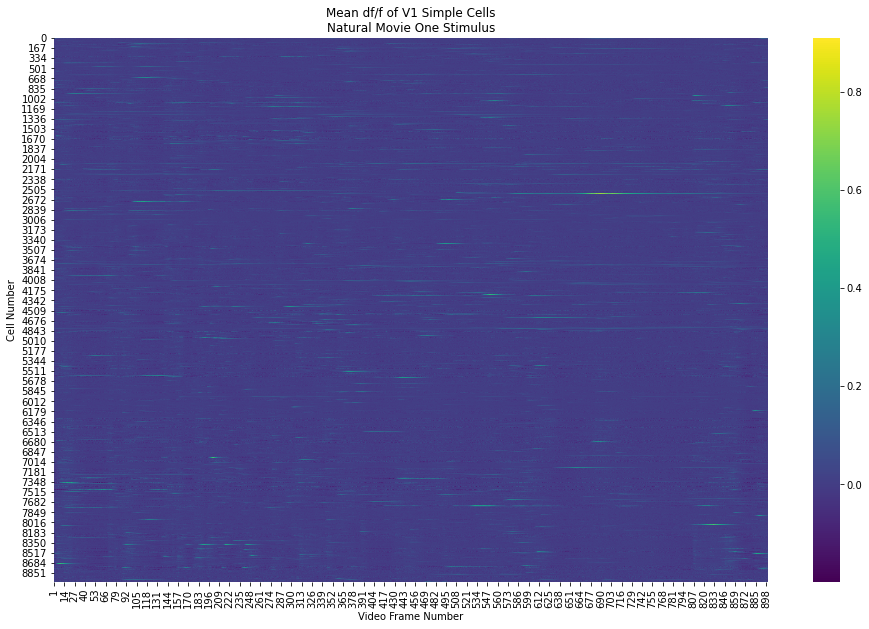

In [8]:
fig = plt.figure(figsize = (16, 10))
seaborn.heatmap(data = trial_avg_agg, cmap = 'viridis')
plt.xlabel('Video Frame Number')
plt.ylabel('Cell Number')
plt.title('Mean df/f of V1 Simple Cells\nNatural Movie One Stimulus')

## Plot Responses For Each V1 Simple Cell to Natural Movie One Stimulus Individually

Here, we can plot each cell's responses individually. We take a cell ID from the AIBO database 
and use that to plot the responses of that cell from our extracted .csv file. We can compare to 
the [track plot on the AIBO website](http://observatory.brain-map.org/visualcoding/search/cell?id=517443835#natural_movie_one_a) for that cell to make sure we correctly saved the responses.

In [14]:
cell_id = 517443835
fpath = [fpath for fpath in cell_fpaths if str(cell_id) == os.path.splitext(os.path.split(fpath)[1])[0]][0]
print(fpath)

../data/AIBO/VISp/L4/ExtractedData/trace_data/natural_movies/517443835.xz


In [15]:
cell_data = pd.read_csv(fpath)
print(cell_data['session_type'].unique())

cell_data = cell_data[cell_data.stimulus == 'natural_movie_one']

['three_session_B']


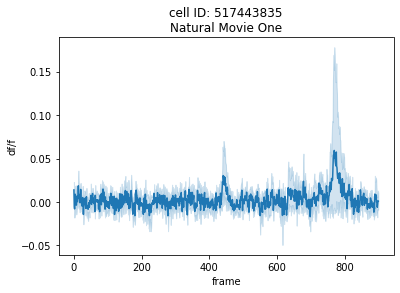

In [16]:
seaborn.lineplot(data = cell_data, x = 'frame', y = 'dff')
plt.title('cell ID: {}\nNatural Movie One'.format(cell_id))
plt.ylabel('df/f')
plt.show()
plt.close()

Plot [another cell's responses](http://observatory.brain-map.org/visualcoding/search/cell?id=675962219#natural_movie_one_a) to the natural movie three stimulus below.

In [19]:
cell_id = 675962219
fpath = [fpath for fpath in cell_fpaths if str(cell_id) == os.path.splitext(os.path.split(fpath)[1])[0]][0]
print(fpath)

../data/AIBO/VISp/L4/ExtractedData/trace_data/natural_movies/675962219.xz


In [20]:
cell_data = pd.read_csv(fpath)
cell_data = cell_data[cell_data.stimulus == 'natural_movie_three']

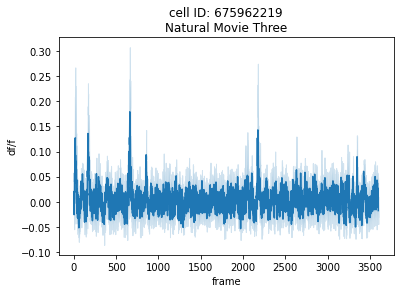

In [22]:
seaborn.lineplot(data = cell_data, x = 'frame', y = 'dff')
plt.title('cell ID: {}\nNatural Movie Three'.format(cell_id))
plt.ylabel('df/f')
plt.show()
plt.close()

[One more cell](http://observatory.brain-map.org/visualcoding/search/cell?id=675961475#natural_movie_one_a) in response to natural movie one.

In [23]:
cell_id = 675961475
fpath = [fpath for fpath in cell_fpaths if str(cell_id) == os.path.splitext(os.path.split(fpath)[1])[0]][0]
print(fpath)

../data/AIBO/VISp/L4/ExtractedData/trace_data/natural_movies/675961475.xz


In [24]:
cell_data = pd.read_csv(fpath)
print(cell_data['session_type'].unique())

['three_session_B' 'three_session_C2' 'three_session_A']


In [25]:
cell_data = cell_data[cell_data.stimulus == 'natural_movie_one']
cell_data = cell_data[cell_data.session_type == 'three_session_A']

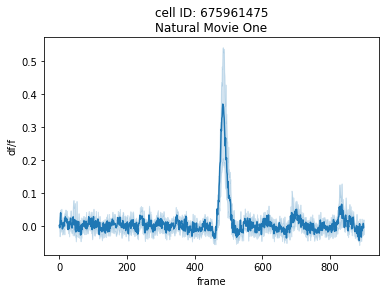

In [26]:
seaborn.lineplot(data = cell_data, x = 'frame', y = 'dff')
plt.title('cell ID: {}\nNatural Movie One'.format(cell_id))
plt.ylabel('df/f')
plt.show()
plt.close()

## Plot Cell Responses to Natural Scenes

[This cell](http://observatory.brain-map.org/visualcoding/search/cell?id=665275808#natural_scene) fired a lot for 
natural scene 105.

In [27]:
natural_scene_dir = '../data/AIBO/VISp/L4/ExtractedData/trace_data/natural_scenes'
cell_fpaths = [os.path.join(natural_scene_dir, f) for f in os.listdir(natural_scene_dir)]

In [28]:
cell_id = 665275808
fpath = [fpath for fpath in cell_fpaths if str(cell_id) == os.path.splitext(os.path.split(fpath)[1])[0]][0]
print(fpath)

../data/AIBO/VISp/L4/ExtractedData/trace_data/natural_scenes/665275808.xz


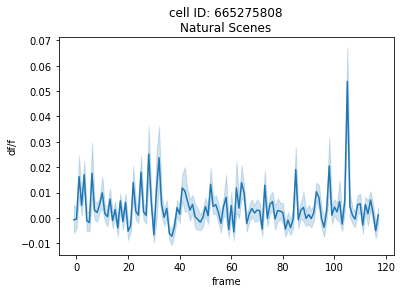

In [29]:
cell_data = pd.read_csv(fpath)

seaborn.lineplot(data = cell_data, x = 'frame', y = 'dff')
plt.title('cell ID: {}\nNatural Scenes'.format(cell_id))
plt.ylabel('df/f')
plt.show()
plt.close()

[This cell](http://observatory.brain-map.org/visualcoding/search/cell?id=517443835#natural_scene) fired a lot for frame 111.

In [30]:
cell_id = 517443835
fpath = [fpath for fpath in cell_fpaths if str(cell_id) == os.path.splitext(os.path.split(fpath)[1])[0]][0]
print(fpath)

../data/AIBO/VISp/L4/ExtractedData/trace_data/natural_scenes/517443835.xz


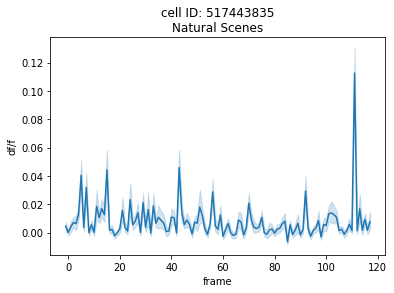

In [31]:
cell_data = pd.read_csv(fpath)

seaborn.lineplot(data = cell_data, x = 'frame', y = 'dff')
plt.title('cell ID: {}\nNatural Scenes'.format(cell_id))
plt.ylabel('df/f')
plt.show()
plt.close()